In [1]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Conv1D, Flatten, Dropout, MaxPool1D, GlobalMaxPooling1D
from keras.layers import  BatchNormalization

C:\Users\mai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 讀入CSV檔案
df = pd.read_csv('preprocessing_output/segmented_news.csv')


In [3]:
df.count

<bound method DataFrame.count of            類別                             title  \
0        news             孫安佐案28日開庭李文估「至少要5年服刑」   
1        news             柯智棠首戰TICC全家動員文青開唱耍流浪風   
2        news               安那攻蛋尬舞打頭陣替阿妹外送珍奶挺舞團   
3        news           【狗仔偷拍】邵雨薇瘦到令人擔心紙片人連道具都吃   
4        news               海倫清桃評選台越小姐舊愛新歡齊聚給祝福   
5        news           夏于喬《粽邪》可望搶「鬼后」她難回現實泣不成聲   
6        news             【有雷】《延禧》大結局受注目她吐黑血超虐心   
7        news            傅達仁兒繼承遺志推《安樂法》號召全民連署公投   
8        news                 魏嘉瑩眼睛「被帥傷」揪元兇竟是鼓鼓   
9        news  Red Velvet加入9月韓星大戰！922、923台大連唱2天   
10       news              agnès b.小羊飾品發想來自她的暱稱   
11       news                   「純妃」賞夏姿秀俠女徐楓相見歡   
12       news             防彈新歌MV再破紀錄網友驚見《蘋果》動新聞   
13       news          不搞笑！網紅三原深情飆鄧紫棋夯歌日文發音融化網友   
14       news              《延禧》莫蘭迪色正夯～指彩跟風玩灰階美色   
15       news             【狗仔偷拍】路嘉怡素顏當網美尪兼挑夫賞蜜桃   
16       news               鍾麗緹替老公拼香火20歲混血長女有話說   
17       news                孫安佐子彈火力總評估最重判10年徒刑  

In [4]:
# 隨機20條新聞
train= df.sample(1000)
test = df.sample(1000)

In [5]:
df.columns

Index(['類別', 'title', 'new content'], dtype='object')

In [6]:
#all data
content=df['new content']
target=df['類別']


#train
train_content=train['new content']
train_target=train['類別']

#test
test_content=test['new content']
test_target=test['類別']

In [7]:
print(train_content)
print("-------------")
print(train_target)
print("-------------")
print(test_content)
print("-------------")
print(test_target)
print("-------------")

863     ['更新', '黃', '呂錦茹', '說法', '國民黨', '中正', '萬華區', '...
1407    ['這天', '中', '南台', '灣', '大雨滂沱', '擔心', '家會', '漏水...
320     ['超硬', '電司', '趴今', '台北', '巨蛋', '登場', '找來', 'JR...
1046    ['微軟', '發表', 'Surface', '家族', '最新', '吋', '平板',...
613     ['台灣', '跨國', '詐騙', '泰國', '越南', '警方', '前', '晚',...
509     ['加拿大籍', '男子', '顏柏萊', '歲', '日前', '遭', '殺害', '分...
112     ['亞太', '影展', '鬧', '烏龍', '亞太', '影展', '繼', '昨天',...
342     ['新增', '影片', '台語', '歌手', '洪榮宏', '日前', '透過', '律...
682     ['說', '見鬼', '最讓人', '膽顫心驚', '非', '鬼屋', '莫屬', '民...
1237    ['新增', '影片', '年', '雅加達', '亞運', '體操', '今晚', '壓軸...
861     ['社民黨', '台北', '市長', '參選人', '范雲今', '臉書', '宣布', ...
990     ['更新', '張女', '臉書', '發文', '新增', '影片', '辛苦', '淹水...
260     ['隸屬於', '美國國會', '美', '中', '經濟', '暨', '安全', '檢討...
511     ['新北市', '新店', '區安成', '街', '一處', '公園', '今天', '午...
298     ['容祖兒', '近日', '參加', '王菲', '主導', '擔任', '幻樂', '體...
375     ['新增', '動', '新聞', '台視', '三立', '周日', '校園', '浪漫'...
381     ['新增', '動', '新聞', 'DIOR', '上半年', '捧', '總價', '約...
1310    ['調整',

In [8]:
#all data
content_list=[]
target_list=[]

for d in content:
     content_list+=[d]
        

for e in target:
     target_list+=[e]


#train
train_content_list=[]
train_target_list=[]

for f in train_content:
     train_content_list+=[f]
        

for g in train_target:
     train_target_list+=[g]
        
#test
test_content_list=[]
test_target_list=[]

for h in test_content:
     test_content_list+=[h]
        

for i in test_target:
     test_target_list+=[i]

In [9]:
train_content_list

["['更新', '黃', '呂錦茹', '說法', '國民黨', '中正', '萬華區', '市議員', '參選人', '林冠', '勳', '昨晚', '涉酒', '駕', '逃逸', '國民黨', '台北市', '黨部', '主委', '黃', '呂錦茹', '下午', '表示', '希望', '林冠', '勳能', '自行', '退選', '目前', '黨部', '已將', '林冠', '勳停', '權並', '取消', '提名', '資格', '補', '提名', '人選', '確定', '黃', '呂錦茹', '晚間', '補充', '表示', '將由市', '議會黨團', '台北市', '黨部', '黃', '復興黨', '部', '共同', '推舉', '出', '實力', '優秀', '肯為', '黨', '付出', '明天', '中午', '前會', '推出', '適當', '人選', '黃', '呂錦茹', '表示', '林冠', '勳', '下午', '前往', '台北市', '黨部', '說明', '表示', '願意', '退選', '神情', '難過', '給予', '安慰', '黃', '呂錦茹', '指出', '原先', '直接', '徵召', '初選', '落敗', '陳', '孝威', '市議員', '初選', '機制', '中', '遞補', '條款', '將由市', '議會黨團', '台北市', '黨部', '黃', '復興黨', '部', '共同', '推舉', '出', '實力', '優秀', '肯為', '黨', '付出', '明天', '中午', '前會', '推出', '適當', '人選', '人選', '包含', '陳', '孝威', '日前', '參加', '台北', '市長', '初選', '落敗', '鍾', '小平', '下周一', '候選人', '登記', '最慢', '明天', '確定', '人選', '國民黨', '黨', '主席', '吳敦義', '參加', '中', '元', '普渡', '拜拜', '時', '問到', '否認', '傷害', '選情', '吳敦義', '長嘆', '一口氣', '說', '昨天', '事情', '發生', '時', '台南', '前', '立委', '林郁方',

In [10]:
test_target_list

['finance',
 'local',
 'international',
 'lifestyle',
 'international',
 '3C',
 'politics',
 'news',
 'politics',
 'sports',
 'international',
 'hot',
 'finance',
 'enterainment',
 'sports',
 'enterainment',
 'finance',
 'politics',
 'international',
 'hot',
 'sports',
 'hot',
 'enterainment',
 'sports',
 'lifestyle',
 'news',
 'hot',
 'politics',
 'hot',
 'finance',
 'international',
 'local',
 'finance',
 'sports',
 '3C',
 'hot',
 'local',
 'enterainment',
 'politics',
 'international',
 'hot',
 'local',
 'life',
 'finance',
 'finance',
 'hot',
 'sports',
 'sports',
 'news',
 '3C',
 'sports',
 'news',
 'enterainment',
 'life',
 'sports',
 'finance',
 'enterainment',
 'sports',
 'politics',
 'news',
 'finance',
 'hot',
 '3C',
 'hot',
 'finance',
 'politics',
 'sports',
 'local',
 'sports',
 'enterainment',
 'politics',
 'news',
 '3C',
 'news',
 'news',
 'enterainment',
 'life',
 'hot',
 'local',
 'enterainment',
 'finance',
 'enterainment',
 'international',
 'hot',
 'lifestyle',
 'in

In [11]:
# TOKENIZER ON content

T_content = Tokenizer()
T_content.fit_on_texts(content_list)  
encoded_content = T_content.texts_to_sequences(content_list)

# TOKENIZER ON target

T_target = Tokenizer()
T_target.fit_on_texts(target_list)  
encoded_target = T_target.texts_to_sequences(target_list)




In [12]:
encoded_content 

[[2409,
  6070,
  19,
  4267,
  6071,
  6072,
  37,
  8451,
  1377,
  7,
  17,
  1744,
  2652,
  3317,
  873,
  424,
  7,
  17,
  1295,
  3721,
  735,
  164,
  3493,
  1063,
  1819,
  6073,
  5500,
  5037,
  350,
  14,
  12,
  17,
  394,
  16,
  612,
  1465,
  5038,
  2965,
  873,
  73,
  424,
  2023,
  457,
  2527,
  13874,
  4268,
  660,
  921,
  3129,
  55,
  1567,
  998,
  491,
  8,
  3318,
  3129,
  113,
  874,
  53,
  3493,
  62,
  11403,
  6689,
  2205,
  6690,
  11404,
  13875,
  6691,
  1427,
  467,
  3319,
  135,
  2205,
  7533,
  3722,
  1063,
  217,
  32,
  873,
  9762,
  1568,
  187,
  1935,
  11405,
  2528,
  13876,
  13877,
  3129,
  5,
  8452,
  736,
  11406,
  8453,
  8454,
  1,
  1,
  8455,
  8456,
  41,
  13878,
  467,
  3320,
  3318,
  8,
  998,
  491,
  8,
  3318,
  3129,
  41,
  800,
  3723,
  2206,
  1220,
  135,
  1568,
  1569,
  1119,
  37,
  13879,
  244,
  364,
  1064,
  3967,
  6074,
  2205,
  9763,
  6,
  1428,
  13880,
  737,
  11407,
  254,
  27,
  22,
  

In [13]:
encoded_target

[[8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [14]:
#pd.to_pickle(df, 'word2vector.pkl')


# 分train/test set
x_train, x_test, y_train, y_test = train_test_split(train, test , test_size=0.2, random_state=2018)


# 對內容進行編碼(超過50字捨去，不足的以0補齊)
x_train_word_ids =T_content.texts_to_sequences(train_content_list)
x_test_word_ids = T_content.texts_to_sequences(test_content_list)
x_train_padded_seqs = pad_sequences(x_train_word_ids, maxlen=150)
x_test_padded_seqs = pad_sequences(x_test_word_ids, maxlen=150)


In [15]:
x_train_padded_seqs

array([[ 1240,  1919,    33, ...,  3942,  1536,   300],
       [  192, 42612,    43, ...,  1294,   268,   818],
       [13897,  2207,   899, ...,    12,    15,    12],
       ...,
       [ 1167,  2770,  2188, ...,  2636,  2637,  2404],
       [    1,   170,  3717, ...,  6471,    14,     2],
       [13208,  5968,  6596, ...,    27,    22,   198]])

In [16]:
x_test_padded_seqs

array([[42054, 42055,  1517, ..., 26249,    35,    74],
       [   47, 27931, 27932, ...,  4507,   416, 22165],
       [ 6485,  5363, 30228, ...,    27,    22,   198],
       ...,
       [   41,  1041,   554, ...,  2037,  1080,  1493],
       [ 2071,     1,     1, ...,  6471,    14,     2],
       [ 2643,   566, 33343, ...,   501,   878,  4572]])

In [17]:
x_test_padded_seqs.shape

(1000, 150)

In [18]:
# 對新聞分類進行編碼
y_train_word_ids =T_target.texts_to_sequences(train_target_list)
y_test_word_ids = T_target.texts_to_sequences(test_target_list)
y_train_padded_seqs = pad_sequences(y_train_word_ids, maxlen=1)
y_test_padded_seqs = pad_sequences(y_test_word_ids, maxlen=1)


In [19]:
y_train_padded_seqs



array([[ 9],
       [ 6],
       [ 2],
       [10],
       [ 4],
       [ 3],
       [ 8],
       [ 2],
       [ 4],
       [ 7],
       [ 9],
       [ 5],
       [ 1],
       [ 3],
       [ 2],
       [ 2],
       [ 2],
       [ 6],
       [ 2],
       [ 8],
       [ 9],
       [ 4],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 4],
       [ 6],
       [ 1],
       [ 9],
       [ 1],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 9],
       [ 2],
       [11],
       [ 8],
       [ 4],
       [ 9],
       [11],
       [ 6],
       [ 6],
       [ 5],
       [ 1],
       [ 3],
       [ 9],
       [ 7],
       [ 4],
       [11],
       [ 5],
       [11],
       [ 6],
       [ 5],
       [ 2],
       [ 4],
       [ 3],
       [ 8],
       [ 3],
       [ 6],
       [11],
       [ 3],
       [ 2],
       [ 1],
       [ 8],
       [ 9],
       [ 5],
       [ 9],
       [11],
       [ 9],
       [ 8],
       [ 9],
       [ 1],

In [20]:
#numpy.ndarray to list
y_train_padded_seqs_list=y_test_padded_seqs.tolist()
y_test_padded_seqs_list=y_test_padded_seqs.tolist()
y_train_padded_seqs

array([[ 9],
       [ 6],
       [ 2],
       [10],
       [ 4],
       [ 3],
       [ 8],
       [ 2],
       [ 4],
       [ 7],
       [ 9],
       [ 5],
       [ 1],
       [ 3],
       [ 2],
       [ 2],
       [ 2],
       [ 6],
       [ 2],
       [ 8],
       [ 9],
       [ 4],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 4],
       [ 6],
       [ 1],
       [ 9],
       [ 1],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 9],
       [ 2],
       [11],
       [ 8],
       [ 4],
       [ 9],
       [11],
       [ 6],
       [ 6],
       [ 5],
       [ 1],
       [ 3],
       [ 9],
       [ 7],
       [ 4],
       [11],
       [ 5],
       [11],
       [ 6],
       [ 5],
       [ 2],
       [ 4],
       [ 3],
       [ 8],
       [ 3],
       [ 6],
       [11],
       [ 3],
       [ 2],
       [ 1],
       [ 8],
       [ 9],
       [ 5],
       [ 9],
       [11],
       [ 9],
       [ 8],
       [ 9],
       [ 1],

In [21]:
type(y_train_padded_seqs_list)

list

# 建立模型


In [22]:
#Embedding
input_dim = 100000
output_dim = 1000
maxlen = 150

#Conv
filters = 20
kernel_size = 3

#train
batch_size = 20
epochs = 30


#Dense
hidden_dims = 100


In [23]:
model = Sequential()

model.add(Embedding(input_dim,
                    output_dim,
                    embeddings_initializer='uniform', 
                    input_length=maxlen))

model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 kernel_initializer='glorot_normal',
                 strides=1))

model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_dims))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Activation('softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 1000)         100000000 
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 20)           60020     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
__________

In [25]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
train_history=model.fit(x_train_padded_seqs, y_train_padded_seqs,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_padded_seqs, y_test_padded_seqs))

C:\Users\mai\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:105: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 100000000 elements. This may consume a large amount of memory.
  num_elements)


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 65s 65ms/step - loss: 17.0924 - acc: 0.0770 - val_loss: 8.3487 - val_acc: 0.1080
Epoch 2/30
1000/1000 [==============================] - 62s 62ms/step - loss: 8.1356 - acc: 0.1090 - val_loss: 7.5350 - val_acc: 0.1470
Epoch 3/30
1000/1000 [==============================] - 61s 61ms/step - loss: 7.1942 - acc: 0.1350 - val_loss: 6.3748 - val_acc: 0.1860
Epoch 4/30
1000/1000 [==============================] - 61s 61ms/step - loss: 5.6331 - acc: 0.2530 - val_loss: 5.3280 - val_acc: 0.3230
Epoch 5/30
1000/1000 [==============================] - 61s 61ms/step - loss: 4.5414 - acc: 0.3300 - val_loss: 5.1445 - val_acc: 0.2470
Epoch 6/30
1000/1000 [==============================] - 61s 61ms/step - loss: 4.0300 - acc: 0.3050 - val_loss: 4.7016 - val_acc: 0.3080
Epoch 7/30
1000/1000 [==============================] - 61s 61ms/step - loss: 3.4556 - acc: 0.3370 - val_loss: 4.5111 - val_acc: 0.3620

In [26]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\mai\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'test', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


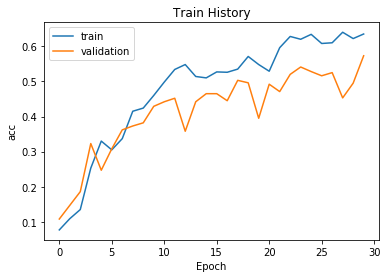

In [27]:
show_train_history(train_history,'acc','val_acc')

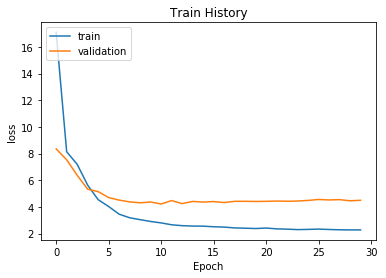

In [28]:
show_train_history(train_history,'loss','val_loss')